In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rc('font', family='Malgun Gothic') #한글 폰트 적용시

In [2]:
import pandas as pd
import geopandas as gpd

c:\Users\leesh\AppData\Local\Programs\Python\Python311\Lib\site-packages\geopandas\_compat.py:124: UserWarning: The Shapely GEOS version (3.10.1-CAPI-1.16.0) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(


In [3]:
# 종분포 데이터
gdf_pt = gpd.read_file('../data/geo_mbris_obis_edu_light.gpkg', encoding="UTF-8")
gdf_pt.info()
gdf_pt.head()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 220833 entries, 0 to 220832
Data columns (total 21 columns):
 #   Column        Non-Null Count   Dtype   
---  ------        --------------   -----   
 0   spc_scitf_nm  220833 non-null  object  
 1   comm_kor_nm   163598 non-null  object  
 2   genus         220681 non-null  object  
 3   genus_nm      164667 non-null  object  
 4   family        220727 non-null  object  
 5   family_nm     163772 non-null  object  
 6   order_        220742 non-null  object  
 7   order_nm      162672 non-null  object  
 8   class         220809 non-null  object  
 9   class_nm      171786 non-null  object  
 10  phylum        220811 non-null  object  
 11  phylum_nm     206406 non-null  object  
 12  kingdom       220833 non-null  object  
 13  kingdom_nm    220833 non-null  object  
 14  lati_val      220833 non-null  float64 
 15  loti_val      220833 non-null  float64 
 16  col_bg_dt     220833 non-null  object  
 17  ssea_id       220833 

,spc_scitf_nm,comm_kor_nm,genus,genus_nm,family,family_nm,order_,order_nm,class,class_nm,...,phylum_nm,kingdom,kingdom_nm,lati_val,loti_val,col_bg_dt,ssea_id,sstrnc_no,kind,geometry
0,Mucor circinelloides,None,Mucor,None,Mucoraceae,None,Mucorales,None,Mucoromycetes,None,...,None,Fungi,균계,38.481861,128.438194,20160802,EM,5055-3,mbris,POINT (128.43819 38.48186)
1,Paralinhomoeus gerlachi,None,Paralinhomoeus,None,Linhomoeidae,None,Monhysterida,None,Chromadorea,None,...,선형동물문,Animalia,동물계,38.269869,128.557564,20160415,EM,55-4,mbris,POINT (128.55756 38.26987)
2,Aplysia kurodai,군소,Aplysia,군소속,Aplysiidae,군소과,Aplysiida,None,Gastropoda,복족강,...,연체동물문,Animalia,동물계,38.271903,128.558261,20190522,EM,55-4,mbris,POINT (128.55826 38.27190)
3,Botrytis cinerea,None,Botrytis,None,Sclerotiniaceae,None,Helotiales,None,Leotiomycetes,None,...,None,Fungi,균계,38.153361,128.608306,19000100,EM,55-7,mbris,POINT (128.60831 38.15336)
4,Trichoderma,None,Trichoderma,None,Hypocreaceae,None,Hypocreales,None,Sordariomycetes,None,...,None,Fungi,균계,37.858556,128.854389,20160926,EM,62-3,mbris,POINT (128.85439 37.85856)


In [4]:
# 소해구 
gdf_sstrnc = gpd.read_file('../data/geo_zn_sstrnc.shp', encoding="UTF-8")
gdf_sstrnc.info()
gdf_sstrnc.head()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 11839 entries, 0 to 11838
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   gid        11839 non-null  float64 
 1   lo_d       11839 non-null  float64 
 2   lo_m       11839 non-null  float64 
 3   lo_s       11839 non-null  float64 
 4   la_d       11839 non-null  float64 
 5   la_m       11839 non-null  float64 
 6   la_s       11839 non-null  float64 
 7   sstrnc_no  11839 non-null  object  
 8   geometry   11839 non-null  geometry
dtypes: float64(7), geometry(1), object(1)
memory usage: 832.6+ KB


,gid,lo_d,lo_m,lo_s,la_d,la_m,la_s,sstrnc_no,geometry
0,1.0,137.0,0.0,0.0,45.0,50.0,0.0,8147-1,"POLYGON ((137.00000 46.00000, 137.16667 46.000..."
1,2.0,137.0,10.0,0.0,45.0,50.0,0.0,8147-2,"POLYGON ((137.16667 46.00000, 137.33333 46.000..."
2,3.0,137.0,20.0,0.0,45.0,50.0,0.0,8147-3,"POLYGON ((137.33333 46.00000, 137.50000 46.000..."
3,4.0,137.0,30.0,0.0,45.0,50.0,0.0,8148-1,"POLYGON ((137.50000 46.00000, 137.66667 46.000..."
4,5.0,137.0,40.0,0.0,45.0,50.0,0.0,8148-2,"POLYGON ((137.66667 46.00000, 137.83333 46.000..."


In [5]:
# 종분포(포인트)에  소해구(폴리곤)를 공간조인  
gdf = gpd.sjoin(gdf_pt, gdf_sstrnc )
gdf.info()
gdf.head()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 220833 entries, 0 to 220830
Data columns (total 30 columns):
 #   Column           Non-Null Count   Dtype   
---  ------           --------------   -----   
 0   spc_scitf_nm     220833 non-null  object  
 1   comm_kor_nm      163598 non-null  object  
 2   genus            220681 non-null  object  
 3   genus_nm         164667 non-null  object  
 4   family           220727 non-null  object  
 5   family_nm        163772 non-null  object  
 6   order_           220742 non-null  object  
 7   order_nm         162672 non-null  object  
 8   class            220809 non-null  object  
 9   class_nm         171786 non-null  object  
 10  phylum           220811 non-null  object  
 11  phylum_nm        206406 non-null  object  
 12  kingdom          220833 non-null  object  
 13  kingdom_nm       220833 non-null  object  
 14  lati_val         220833 non-null  float64 
 15  loti_val         220833 non-null  float64 
 16  col_bg_dt        

,spc_scitf_nm,comm_kor_nm,genus,genus_nm,family,family_nm,order_,order_nm,class,class_nm,...,geometry,index_right,gid,lo_d,lo_m,lo_s,la_d,la_m,la_s,sstrnc_no_right
0,Mucor circinelloides,None,Mucor,None,Mucoraceae,None,Mucorales,None,Mucoromycetes,None,...,POINT (128.43819 38.48186),2834,2835.0,128.0,20.0,0.0,38.0,20.0,0.0,5055-3
201300,Bacillus mycoides,None,Bacillus,None,Bacillaceae,None,Caryophanales,None,Bacilli,None,...,POINT (128.42611 38.49889),2834,2835.0,128.0,20.0,0.0,38.0,20.0,0.0,5055-3
216285,Vibrio tasmaniensis,None,Vibrio,None,Vibrionaceae,None,Vibrionales,None,Gammaproteobacteria,None,...,POINT (128.46288 38.44809),2834,2835.0,128.0,20.0,0.0,38.0,20.0,0.0,5055-3
216286,Penicillium ortum,None,Penicillium,None,Aspergillaceae,None,Eurotiales,None,Eurotiomycetes,None,...,POINT (128.43836 38.48139),2834,2835.0,128.0,20.0,0.0,38.0,20.0,0.0,5055-3
216287,Arthrinium koreanum,None,Arthrinium,None,Apiosporaceae,None,Xylariales,None,Sordariomycetes,None,...,POINT (128.43836 38.48139),2834,2835.0,128.0,20.0,0.0,38.0,20.0,0.0,5055-3


In [6]:
# 소해구별 건수 집계
df_size = gdf.groupby(['sstrnc_no_right'], as_index=False ).size() 
df_size.info()
df_size.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 656 entries, 0 to 655
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   sstrnc_no_right  656 non-null    object
 1   size             656 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 10.4+ KB


,sstrnc_no_right,size
0,100-1,364
1,100-2,174
2,100-3,4
3,100-4,473
4,104-1,256


In [7]:
# 집계 결과를 소해구 폴리곤에 속성 조인
gdf_sstrnc2 = pd.merge(gdf_sstrnc, df_size, left_on='sstrnc_no', right_on='sstrnc_no_right', how='left')
gdf_sstrnc2.head()

,gid,lo_d,lo_m,lo_s,la_d,la_m,la_s,sstrnc_no,geometry,sstrnc_no_right,size
0,1.0,137.0,0.0,0.0,45.0,50.0,0.0,8147-1,"POLYGON ((137.00000 46.00000, 137.16667 46.000...",NaN,NaN
1,2.0,137.0,10.0,0.0,45.0,50.0,0.0,8147-2,"POLYGON ((137.16667 46.00000, 137.33333 46.000...",NaN,NaN
2,3.0,137.0,20.0,0.0,45.0,50.0,0.0,8147-3,"POLYGON ((137.33333 46.00000, 137.50000 46.000...",NaN,NaN
3,4.0,137.0,30.0,0.0,45.0,50.0,0.0,8148-1,"POLYGON ((137.50000 46.00000, 137.66667 46.000...",NaN,NaN
4,5.0,137.0,40.0,0.0,45.0,50.0,0.0,8148-2,"POLYGON ((137.66667 46.00000, 137.83333 46.000...",NaN,NaN


In [8]:
# 위의 결과에서 size가 null인 것은 제외
gdf_sstrnc3 = gdf_sstrnc2.loc[ gdf_sstrnc2.notnull()['size'] , :]
gdf_sstrnc3.head()

,gid,lo_d,lo_m,lo_s,la_d,la_m,la_s,sstrnc_no,geometry,sstrnc_no_right,size
2720,2721.0,128.0,20.0,0.0,38.0,30.0,0.0,47-9,"POLYGON ((128.33333 38.66667, 128.50000 38.666...",47-9,6.0
2834,2835.0,128.0,20.0,0.0,38.0,20.0,0.0,5055-3,"POLYGON ((128.33333 38.50000, 128.50000 38.500...",5055-3,1261.0
2835,2836.0,128.0,30.0,0.0,38.0,20.0,0.0,55-1,"POLYGON ((128.50000 38.50000, 128.66667 38.500...",55-1,1563.0
2837,2838.0,128.0,50.0,0.0,38.0,20.0,0.0,55-3,"POLYGON ((128.83333 38.50000, 129.00000 38.500...",55-3,15.0
2838,2839.0,129.0,0.0,0.0,38.0,20.0,0.0,56-1,"POLYGON ((129.00000 38.50000, 129.16667 38.500...",56-1,1.0


In [9]:
import mapclassify as mc

c:\Users\leesh\AppData\Local\Programs\Python\Python311\Lib\site-packages\geopandas\plotting.py:732: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(values.dtype):


<Axes: >

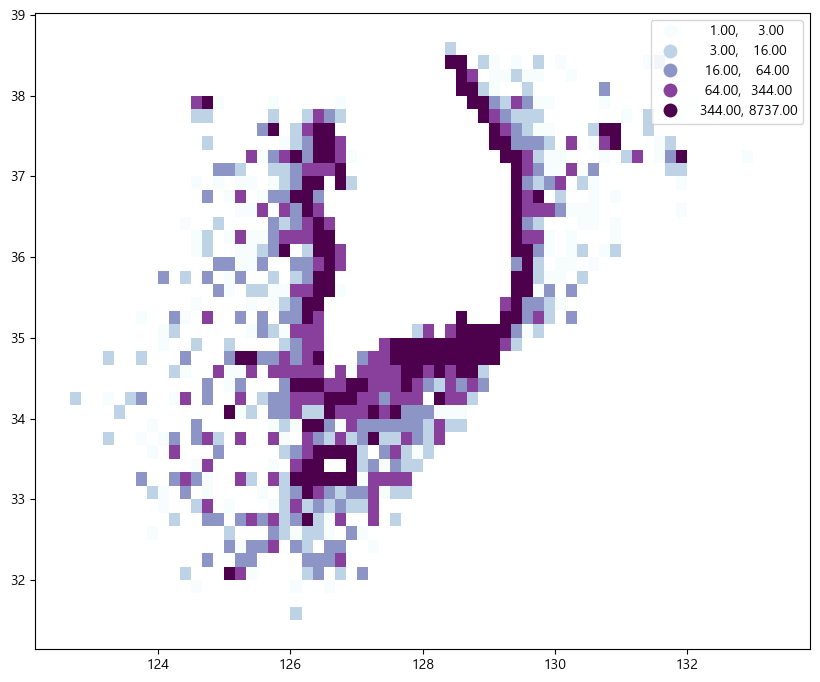

In [10]:
gdf_sstrnc3.plot(column='size'              # 정량 속성 항목
                 , scheme='QUANTILES'       # 단계 구분 기법
                 , k=5                      #단계(등급) 갯수
                 , cmap='BuPu'              #컬러맵
                 , legend=True
                 , figsize=(10, 10))     

c:\Users\leesh\AppData\Local\Programs\Python\Python311\Lib\site-packages\geopandas\plotting.py:732: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(values.dtype):


<Axes: >

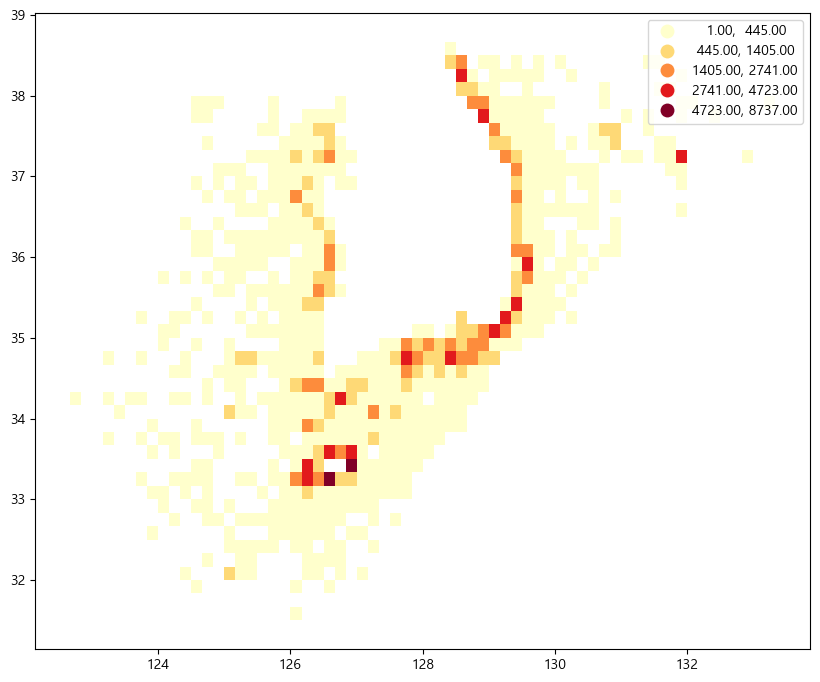

In [11]:
gdf_sstrnc3.plot(column='size', scheme='NaturalBreaks', k=5, cmap='YlOrRd', legend=True, figsize=(10, 10))   

Matplotlib의 Colormap 설명   
https://matplotlib.org/stable/tutorials/colors/colormaps.html